# Video Game Sales

### Подключение библиотек

In [123]:
import numpy as np

import pandas as pd

### Загрузка данных

In [124]:
vgs = pd.read_csv('vgsales.csv')

In [125]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Описание данных

Этот набор данных содержит список видеоигр, продажи которых превысили 100 000 копий.

Name - Название игры

Platform - Платформа выпуска игр (например, PC, PS4 и т.д.)

Year - Год выпуска игры

Genre - Жанр игры

Publisher - Издатель игры

NA_Sales - Продажи в Северной Америке (в миллионах)

EU_Sales - Продажи в Европе (в миллионах)

JP_Sales - Продажи в Японии (в миллионах)

Other_Sales - Продажи в остальном мире (в миллионах)

Global_Sales - Общий объем продаж по всему миру.


##### Выведите размерность и краткую информацию о наборе данных

In [126]:
vgs.shape

(16598, 11)

In [127]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


##### Выведите краткую статистическую информацию по набору данных

In [128]:
vgs.describe()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [129]:
vgs.describe(include=['object'])



,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


##### Проверьте набор данных на наличие пропущенных и дублирующих значений

In [130]:
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Напишите краткий вывод о наборе данных

### Заполнение пустых записей

Удалите пропущенные значения по признаку Publisher, а по признаку Year - замените на среднее значение. Значения по полю Year преобразуйте в целый тип. Удалите признак Rank. После преобразований, убедитесь, что изменения сохранились в наборе данных.

In [131]:
vgs.dropna(subset=['Publisher'], inplace=True)


In [132]:
vgs['Year'].fillna(vgs['Year'].mean(), inplace=True)


In [133]:
vgs['Year'] = vgs['Year'].astype(int)


In [134]:
vgs.drop('Rank', axis=1, inplace=True)


In [135]:
vgs.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [136]:
vgs.isnull().sum()


Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [137]:
vgs.shape


(16540, 10)

In [138]:
vgs.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16540 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16540 non-null  object 
 1   Platform      16540 non-null  object 
 2   Year          16540 non-null  int64  
 3   Genre         16540 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16540 non-null  float64
 6   EU_Sales      16540 non-null  float64
 7   JP_Sales      16540 non-null  float64
 8   Other_Sales   16540 non-null  float64
 9   Global_Sales  16540 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


### Анализ продаж видеоигр

#### 1. В каком году было выпущено больше всего игр? Выведите первые 10 записей.

In [139]:
vgs['Year'].value_counts().head(10)


Year
2009    1431
2008    1428
2006    1257
2010    1257
2007    1201
2011    1136
2005     936
2002     829
2003     775
2004     744
Name: count, dtype: int64

<Axes: xlabel='Year'>

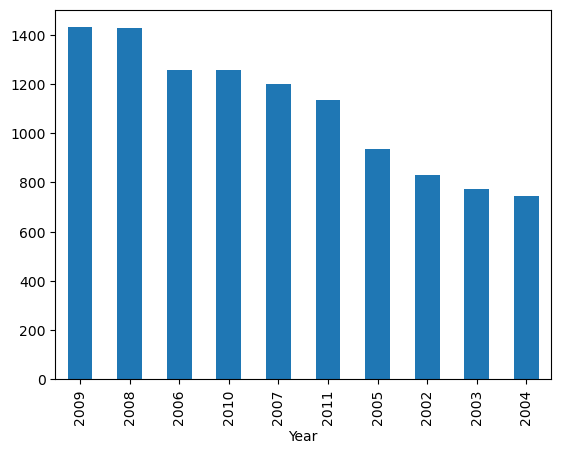

In [140]:
vgs['Year'].value_counts().head(10).plot(kind='bar')


In [141]:
print(f"Количество уникальных значений в Platform: {vgs['Platform'].nunique()}")
print(f"Количество уникальных значений в Genre: {vgs['Genre'].nunique()}")
print(f"Количество уникальных значений в Publisher: {vgs['Publisher'].nunique()}")


Количество уникальных значений в Platform: 31
Количество уникальных значений в Genre: 12
Количество уникальных значений в Publisher: 578


<Axes: xlabel='Year', ylabel='Global_Sales'>

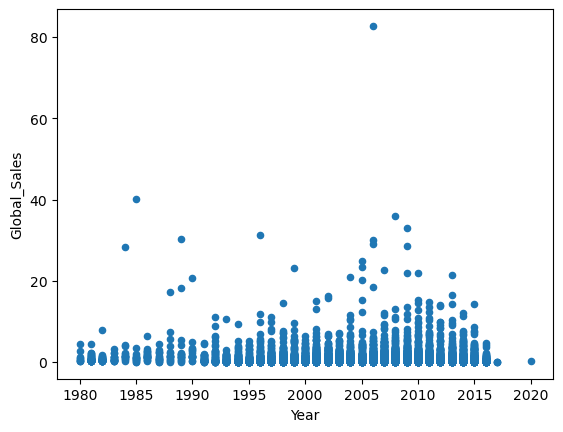

In [142]:
vgs.plot(x='Year', y='Global_Sales', kind='scatter')


#### 2. Получите среднюю стоимость продаж в Европе 

In [143]:
vgs['EU_Sales'].mean()


0.1468833131801693

#### 3. Получите максимальную стоимость продаж в Японии и вывведите полную информацию об игре с максимальной суммой продаж

In [144]:
vgs['JP_Sales'].max()


10.22

In [145]:
vgs[vgs['JP_Sales'] == vgs['JP_Sales'].max()]



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


##### Выведите первые 10 записей с максимальными суммами продажам в Японии по годам

In [146]:
vgs.sort_values(by='JP_Sales', ascending=False).head(10)[['Year', 'JP_Sales']]


,Year,JP_Sales
4,1996,10.22
12,1999,7.20
1,1985,6.81
6,2006,6.50
20,2006,6.04
26,2010,5.65
25,2002,5.38
41,2005,5.33
27,2005,5.32
214,2010,4.87


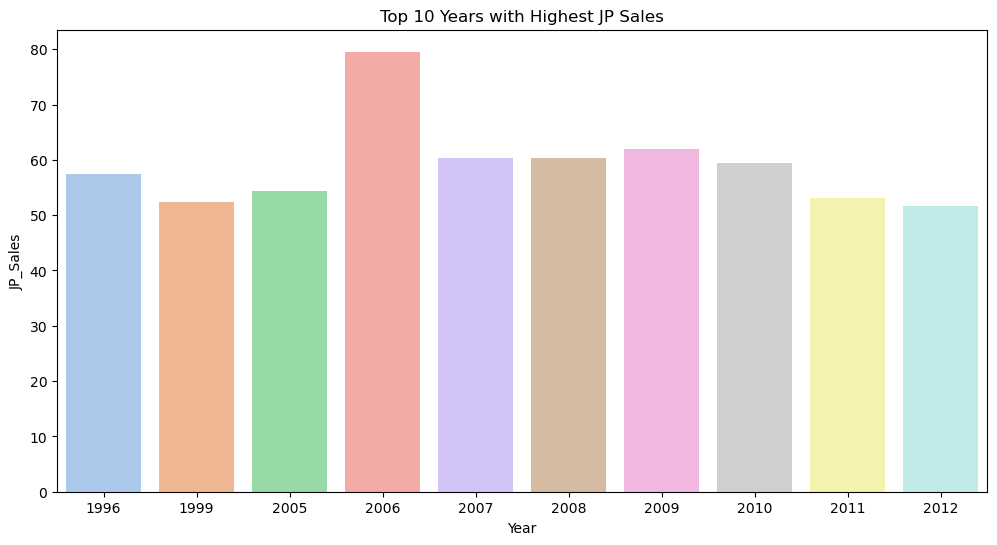

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

top_years = vgs.groupby('Year')['JP_Sales'].sum().nlargest(10).index
data = vgs[vgs['Year'].isin(top_years)].groupby('Year')['JP_Sales'].sum()

plt.figure(figsize=(12,6)) 
sns.barplot(x=data.index, y=data.values, palette='pastel')
plt.xlabel('Year')
plt.ylabel('JP_Sales')
plt.title('Top 10 Years with Highest JP Sales')
plt.show()




#### 4. К какому жанру относится видеоигра "Brain Age 2: More Training in Minutes a Day" video game?

In [148]:
vgs[vgs['Name'] == 'Brain Age 2: More Training in Minutes a Day']['Genre']


27    Puzzle
Name: Genre, dtype: object

#### 5.  Каков объём продаж видеоигры «Grand Theft Auto: Vice City» по всему миру?

In [149]:
vgs[vgs['Name'] == 'Grand Theft Auto: Vice City']['Global_Sales']



24       16.15
13732     0.04
Name: Global_Sales, dtype: float64

In [150]:
vgs[vgs['Name'] == 'Grand Theft Auto: Vice City']


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
13732,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0.00,0.03,0.00,0.01,0.04


#### 6. Выведите название видеоигры, которая имеет самые высокие продажи в Северной Америке.

In [151]:
vgs[vgs['NA_Sales'] == vgs['NA_Sales'].max()]['Name']


0    Wii Sports
Name: Name, dtype: object

#### 7. Выведите видеоигры с самыми низкими продажами в мире

In [152]:
vgs[vgs['Global_Sales'] == vgs['Global_Sales'].min()][['Name', 'Global_Sales']]


,Name,Global_Sales
15980,Turok,0.01
15981,Coven and Labyrinth of Refrain,0.01
15982,Super Battle For Money Sentouchuu: Kyuukyoku n...,0.01
15983,Dragon Zakura DS,0.01
15984,Chameleon: To Dye For!,0.01
...,...,...
16593,Woody Woodpecker in Crazy Castle 5,0.01
16594,Men in Black II: Alien Escape,0.01
16595,SCORE International Baja 1000: The Official Game,0.01
16596,Know How 2,0.01


#### 8. Игр какого жанра было создано больше всего?

In [153]:
vgs['Genre'].nunique()


12

In [154]:
vgs['Genre'].unique()


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [155]:
vgs['Genre'].value_counts()


Genre
Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: count, dtype: int64

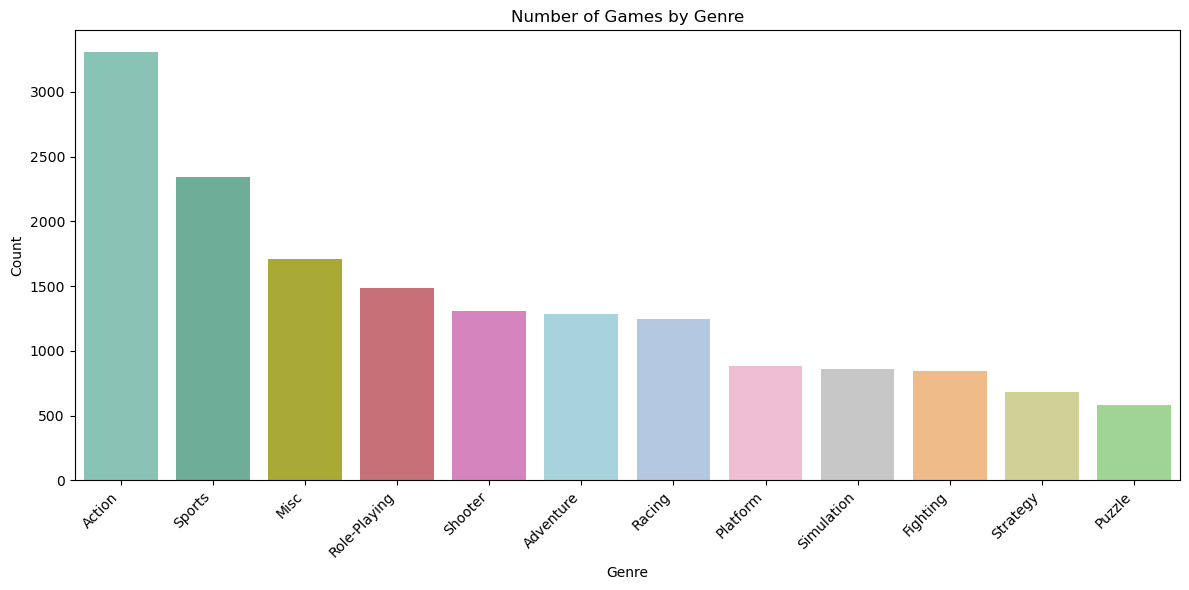

In [156]:
genre_counts = vgs['Genre'].value_counts()
plt.figure(figsize=(12,6))

colors = ['#7fcdbb', '#63b79b', '#bcbd22', '#d6616b', '#e377c2', '#9edae5', '#aec7e8', '#f7b6d2', '#c7c7c7', '#ffbb78', '#dbdb8d', '#98df8a']

sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=colors)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Games by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 9. Лучшие игры за 5 лет выпуска по жанрам

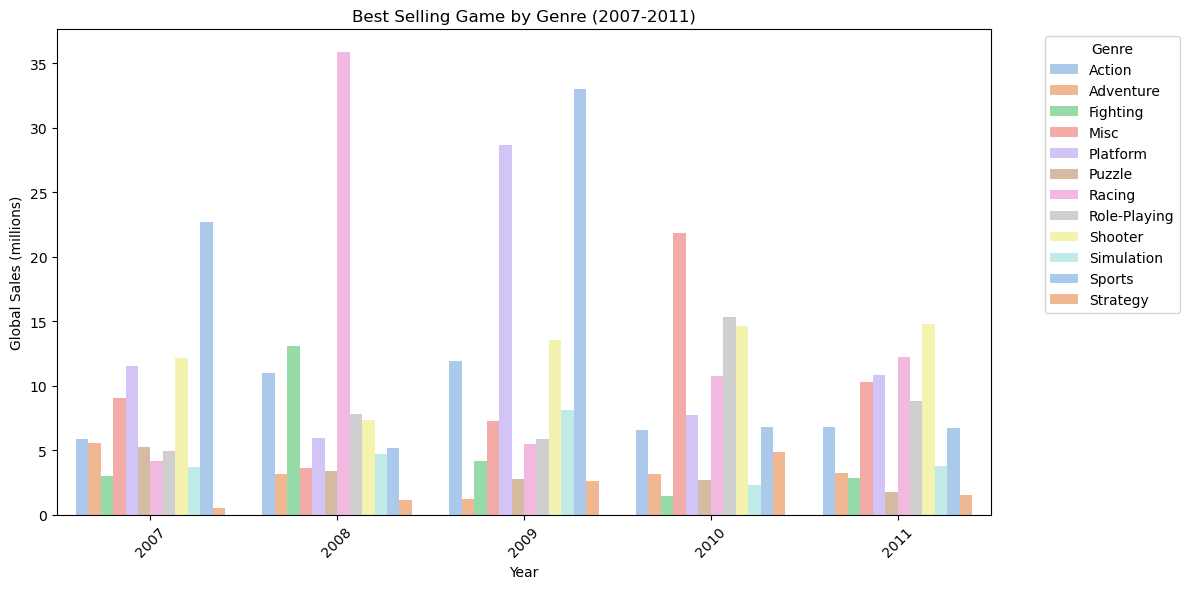

In [175]:
# Выбираем годы с 2007 по 2011
selected_years = [2007, 2008, 2009, 2010, 2011]
vgs_selected = vgs[vgs['Year'].isin(selected_years)]

# Находим самые продаваемые игры по жанрам для каждого года
best_games = vgs_selected.groupby(['Year', 'Genre']).apply(lambda x: x.nlargest(1, 'Global_Sales')).reset_index(drop=True)

# Строим график
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Global_Sales', hue='Genre', data=best_games, palette='pastel')

plt.title('Best Selling Game by Genre (2007-2011)')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#### 10.  В каком году были самые высокие продажи по всему миру?¶

In [158]:
data_year = vgs.groupby('Year')['Global_Sales'].sum()



In [159]:
data_year.nlargest(1)


Year
2008    678.9
Name: Global_Sales, dtype: float64

In [160]:
data_year.head(10)


Year
1980    11.38
1981    35.77
1982    28.86
1983    16.79
1984    50.36
1985    53.94
1986    37.07
1987    21.74
1988    47.22
1989    73.45
Name: Global_Sales, dtype: float64

#### 11. Игры какого жанра имеют самую высокую цену продажи в мире

In [161]:
genre_sales = vgs.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)


<Axes: xlabel='Genre'>

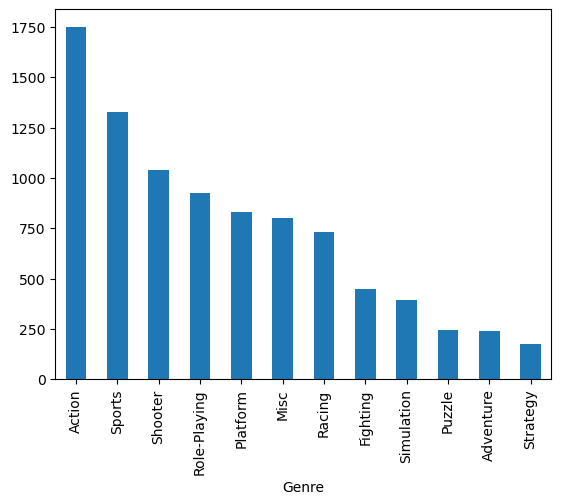

In [162]:
genre_sales.plot(kind='bar')


#### 12. На какой платформе самая высокая цена продажи в мире?

In [163]:
platform_sales = vgs.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)


<Axes: xlabel='Platform'>

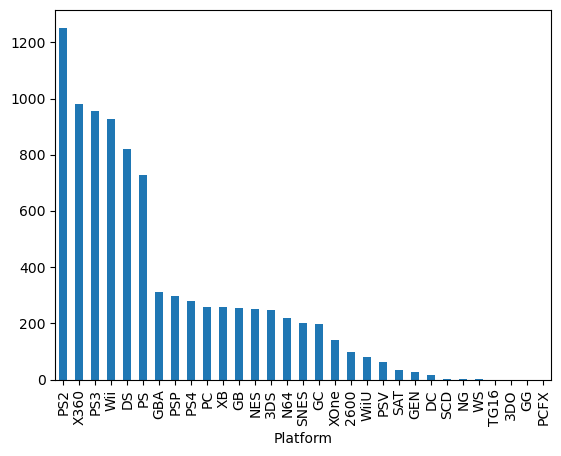

In [164]:
platform_sales.plot(kind='bar')


#### 13. Выведите топ 20 Publisher

In [165]:
top_publishers = vgs['Publisher'].value_counts().nlargest(20)


<Axes: xlabel='Publisher'>

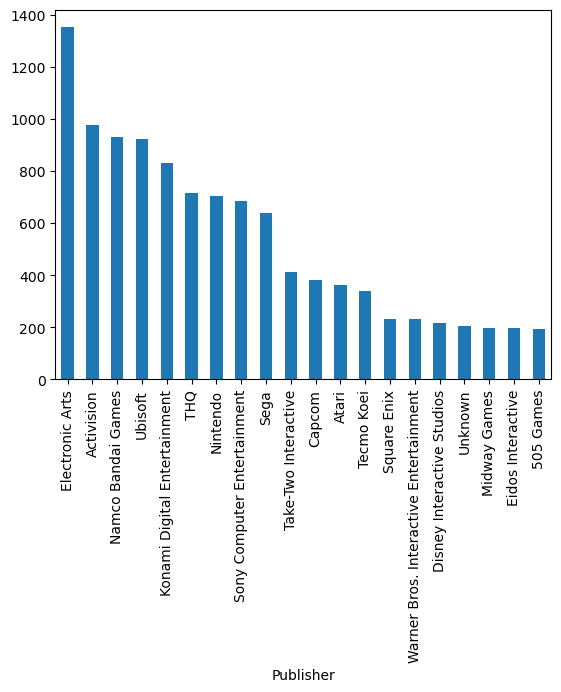

In [166]:
top_publishers.plot(kind='bar')


#### 14. Общий доход по регионам

In [167]:
vgs.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [168]:
region_sales = pd.DataFrame({
    'region': ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
    'sale': [vgs['NA_Sales'].sum(), vgs['EU_Sales'].sum(), vgs['JP_Sales'].sum(), vgs['Other_Sales'].sum()]
})
region_sales


,region,sale
0,NA_Sales,4384.41
1,EU_Sales,2429.45
2,JP_Sales,1290.09
3,Other_Sales,797.08


<Axes: ylabel='sale'>

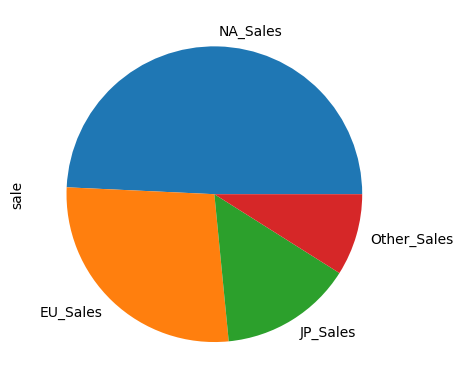

In [169]:
region_sales.set_index('region')['sale'].plot(kind='pie')


### 15.Pair plot

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


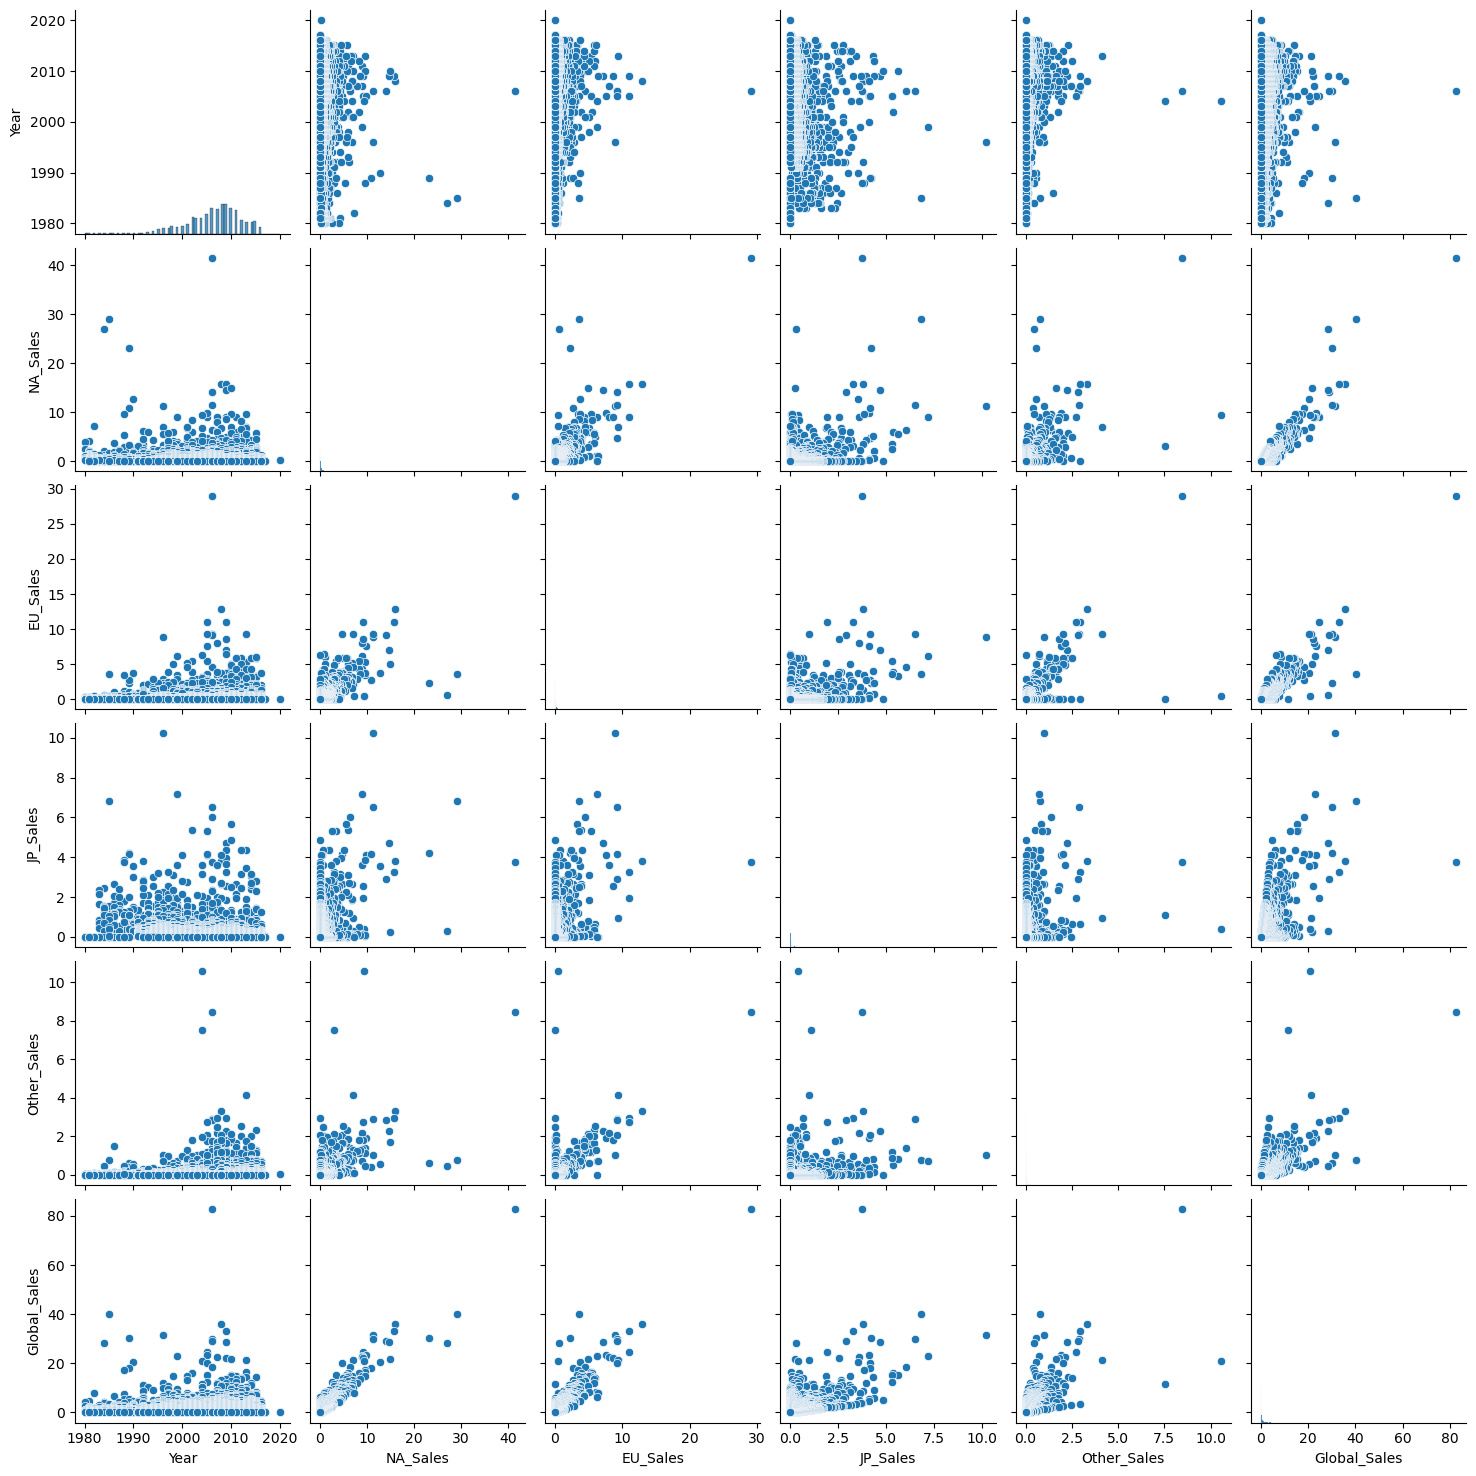

In [170]:
sns.pairplot(vgs[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].dropna())
plt.show()



#### 16. Выведите 3 самых распространенных жанра видеоигр в мире

In [171]:
vgs['Genre'].value_counts().head(3)


Genre
Action    3309
Sports    2343
Misc      1712
Name: count, dtype: int64

### 17. В названиях скольких видеоигр есть слово «super» ??

In [172]:
super_games = vgs[vgs['Name'].str.contains('Super', case=False, na=False)]


In [174]:
ASD = len(super_games)
print(ASD)


383
